<a href="https://colab.research.google.com/github/kauah23/D._Redu-o-de-dimensionalidade/blob/main/Redu%C3%A7%C3%A3o_de_Dimensionalidade_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagem colorida carregada com sucesso!


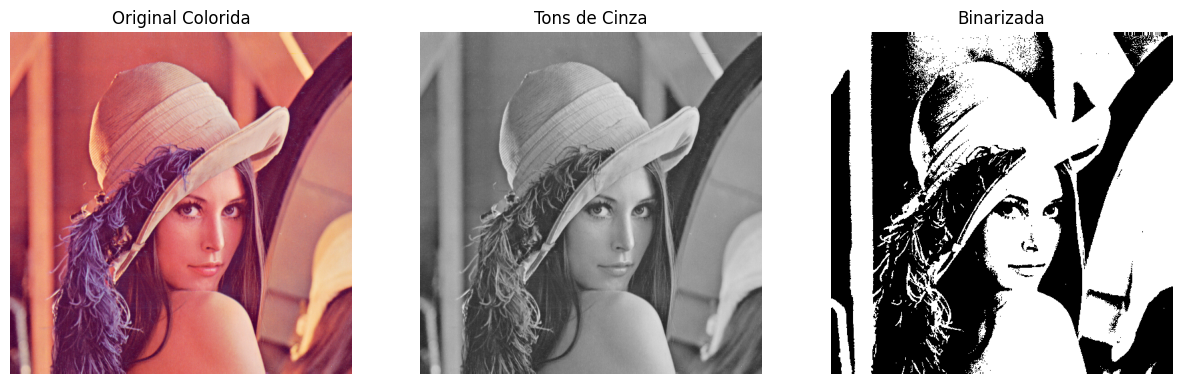

In [9]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Função para converter uma imagem colorida para tons de cinza manualmente
def color_to_grayscale(image):
    width, height = len(image[0]), len(image)
    grayscale_image = []
    for y in range(height):
        grayscale_row = []
        for x in range(width):
            r, g, b = image[y][x]
            gray_value = int((r + g + b) / 3)  # Média dos valores RGB
            grayscale_row.append((gray_value, gray_value, gray_value))  # Retorna no formato RGB
        grayscale_image.append(grayscale_row)
    return grayscale_image

# Função para binarizar uma imagem em tons de cinza manualmente
def grayscale_to_binary(grayscale_image, threshold=128):
    width, height = len(grayscale_image[0]), len(grayscale_image)
    binary_image = []
    for y in range(height):
        binary_row = []
        for x in range(width):
            gray_value = grayscale_image[y][x][0]  # Todos os canais têm o mesmo valor
            binary_value = 255 if gray_value >= threshold else 0
            binary_row.append((binary_value, binary_value, binary_value))  # Retorna no formato RGB
        binary_image.append(binary_row)
    return binary_image

# Função para carregar uma imagem de uma URL e convertê-la para uma matriz de pixels
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.convert('RGB')  # Garante que a imagem esteja no formato RGB
    pixel_data = list(img.getdata())
    width, height = img.size
    return [pixel_data[i * width:(i + 1) * width] for i in range(height)]

# Função para converter uma matriz de pixels para uma imagem PIL
def pixel_matrix_to_pil(pixel_matrix):
    height = len(pixel_matrix)
    width = len(pixel_matrix[0])
    flat_pixels = [pixel for row in pixel_matrix for pixel in row]
    img = Image.new("RGB", (width, height))
    img.putdata(flat_pixels)
    return img

# URL da imagem de entrada
image_url = "https://upload-wikimedia-org.translate.goog/wikipedia/en/7/7d/Lenna_%28test_image%29.png?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt&_x_tr_pto=tc"  # Substitua pelo URL da sua imagem

# Carrega a imagem colorida
try:
    color_image = load_image_from_url(image_url)
    print("Imagem colorida carregada com sucesso!")

    # Converte para tons de cinza manualmente
    grayscale_image = color_to_grayscale(color_image)

    # Converte para binário manualmente
    binary_image = grayscale_to_binary(grayscale_image)

    # Converte as imagens processadas de volta para formato PIL para exibição
    grayscale_pil = pixel_matrix_to_pil(grayscale_image)
    binary_pil = pixel_matrix_to_pil(binary_image)

    # Exibe as imagens
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Colorida")
    plt.imshow(pixel_matrix_to_pil(color_image))
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Tons de Cinza")
    plt.imshow(grayscale_pil)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Binarizada")
    plt.imshow(binary_pil)
    plt.axis("off")

    plt.show()

except Exception as e:
    print(f"Erro ao carregar ou processar a imagem: {e}")
